## 이상치를 각 열의 평균값으로 대체하기

이상치를 각 열의 평균값으로 대체했을 때 violin plot을 볼 때 분포가 크게 변화하는 것을 확인할 수 있다. 과연 이상치들을 평균값으로 바꾸는 것이 올바른 방법일까? 데이터 자제의 신뢰도와 품질을 오히려 떨어뜨릴 수도 있기에 이상치를 대체하는 최선의 방법을 찾기 위해서는 더 많은 탐구가 필요할 것 같다. 단순히 평균값으로 모든 값들을 대체하는 것은 옳지 않다. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('winequality-red.csv')

In [43]:
df = df.drop_duplicates()

In [44]:
import pandas as pd

# df를 복사하여 data에 저장
data = df.copy()

# 각 열의 이상치를 저장할 변수 초기화
outliers_dict = {}

# 각 열에 대한 반복문
for column_name in df.columns:
    # IQR을 사용하여 이상치 탐지
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 저장
    outliers = data[column_name][(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    outliers_dict[column_name + '_df1'] = outliers
    
    # 이상치를 열의 평균으로 대체
    data.loc[(data[column_name] < lower_bound) | (data[column_name] > upper_bound), column_name] = data[column_name].mean()

# 이상치가 대체된 데이터프레임을 df1에 저장
df1 = data

In [45]:
outliers_dict['pH_df1']

45      3.90
94      3.75
95      3.85
151     2.74
268     3.69
440     2.88
544     2.86
553     3.74
554     2.92
557     2.92
588     3.72
614     2.87
650     2.89
657     2.92
695     3.90
821     3.71
930     3.69
996     3.71
1017    2.89
1111    3.78
1270    3.70
1300    3.78
1316    4.01
1319    2.90
1321    4.01
1377    3.71
1470    2.88
1488    3.72
Name: pH, dtype: float64

In [46]:
df.loc[1316, 'pH']

4.01

In [47]:
df['pH'].mean()

3.309786607799853

In [48]:
df1.loc[1316,'pH']

3.309786607799853

In [50]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.162203,0.521052,0.271797,2.219646,0.079370,15.215030,43.520728,0.996710,3.307310,0.636151,10.401647,5.612824
std,1.495346,0.167497,0.194536,0.445846,0.015226,9.143147,27.260450,0.001650,0.139741,0.117172,1.030630,0.746179
min,4.600000,0.120000,0.000000,0.900000,0.039000,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996709,3.309787,0.620000,10.200000,6.000000
75%,9.000000,0.630000,0.430000,2.523400,0.088124,21.000000,58.000000,0.997800,3.395000,0.700000,11.100000,6.000000
max,12.300000,1.010000,0.790000,3.650000,0.122000,42.000000,124.000000,1.001000,3.680000,0.990000,13.500000,7.000000


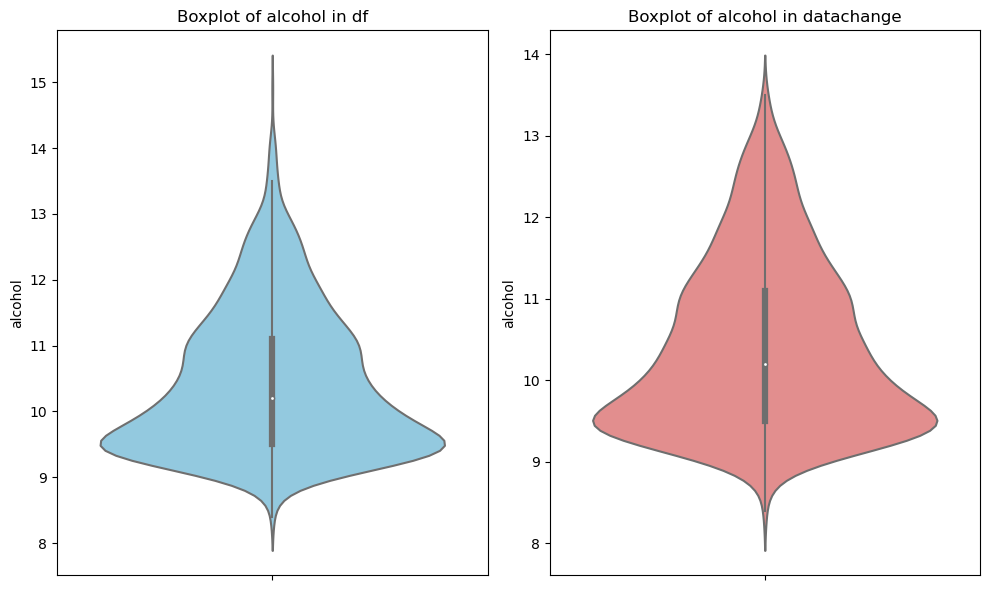

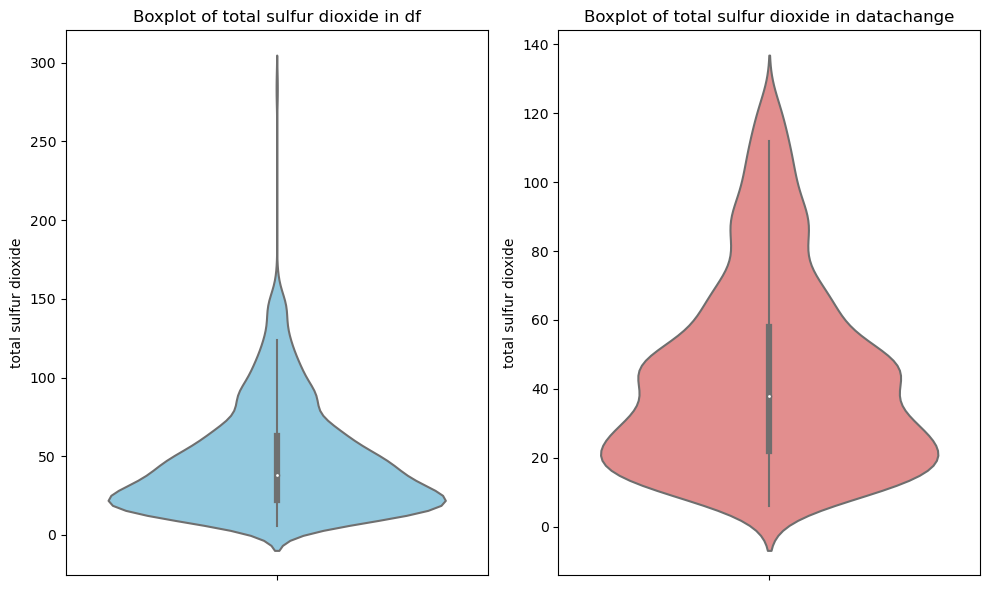

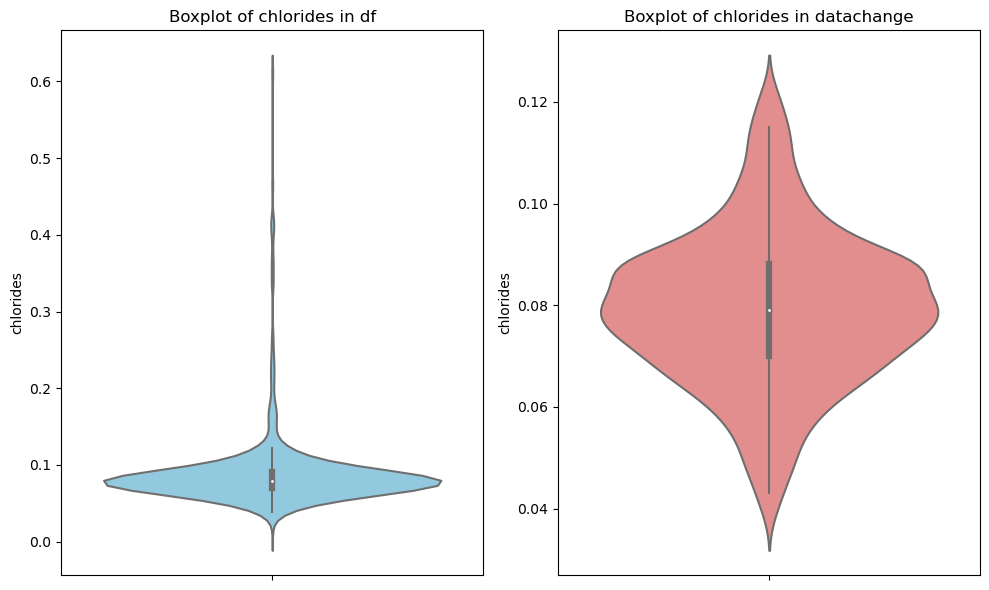

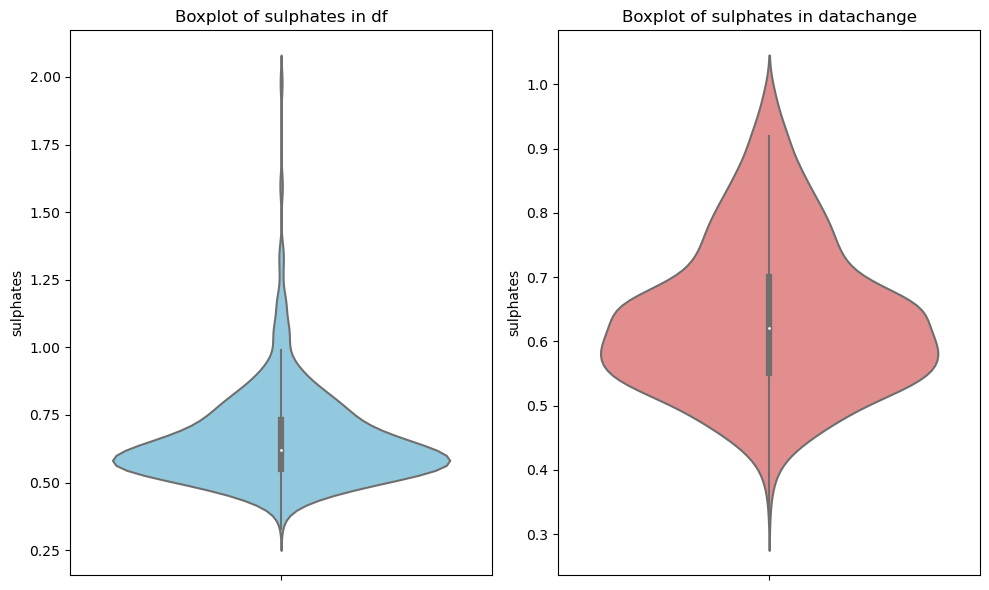

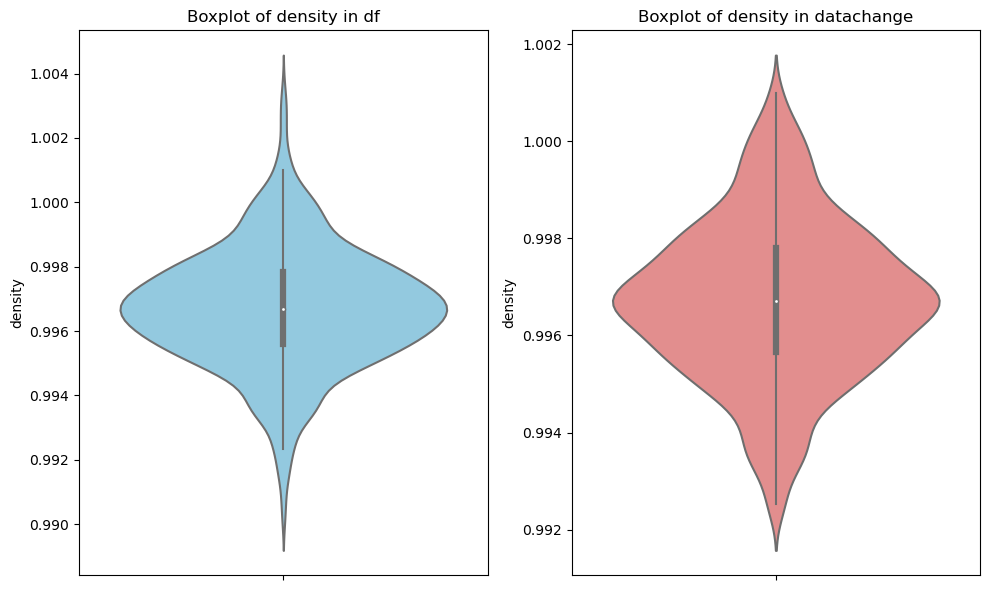

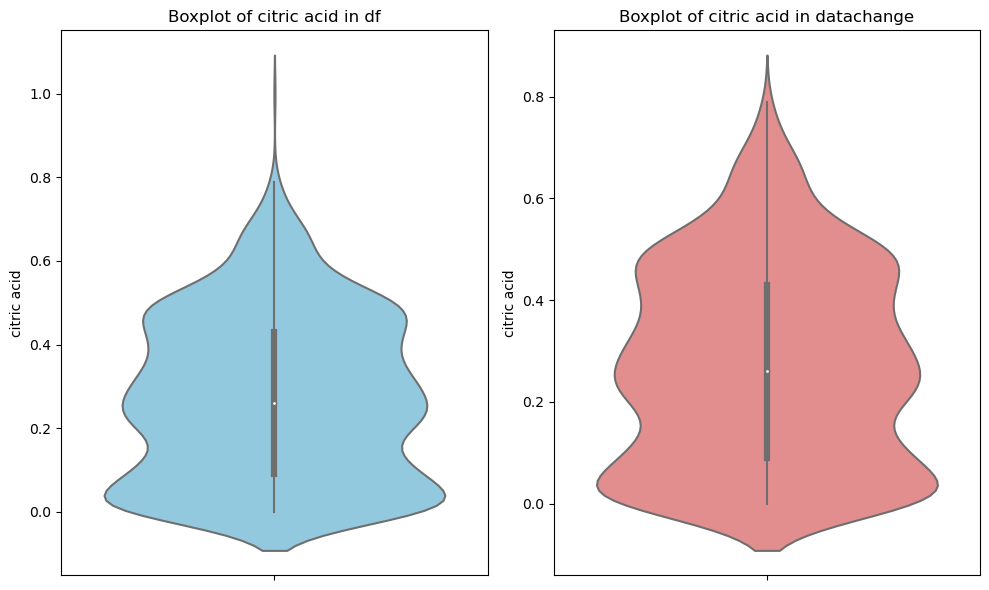

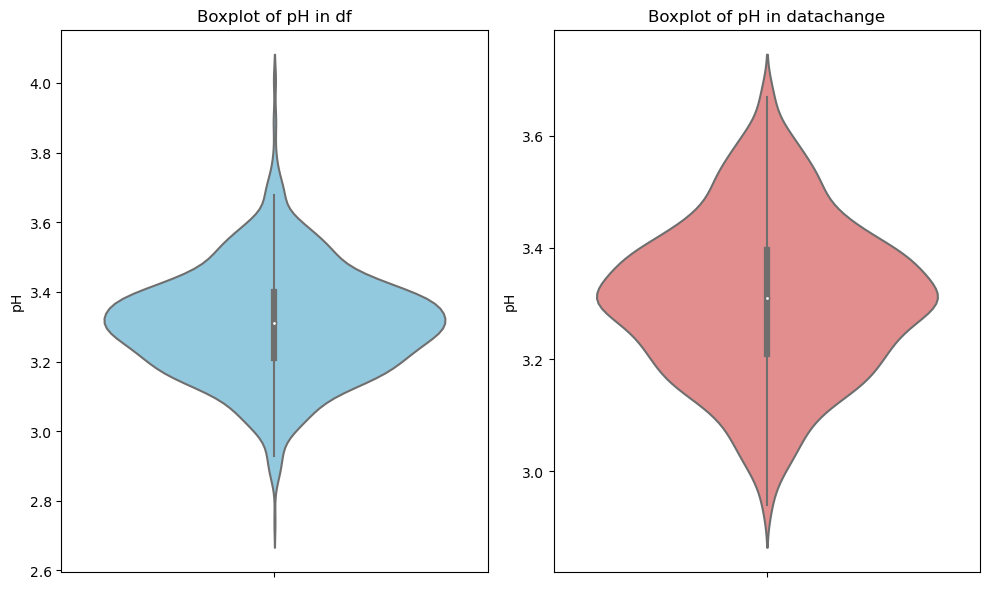

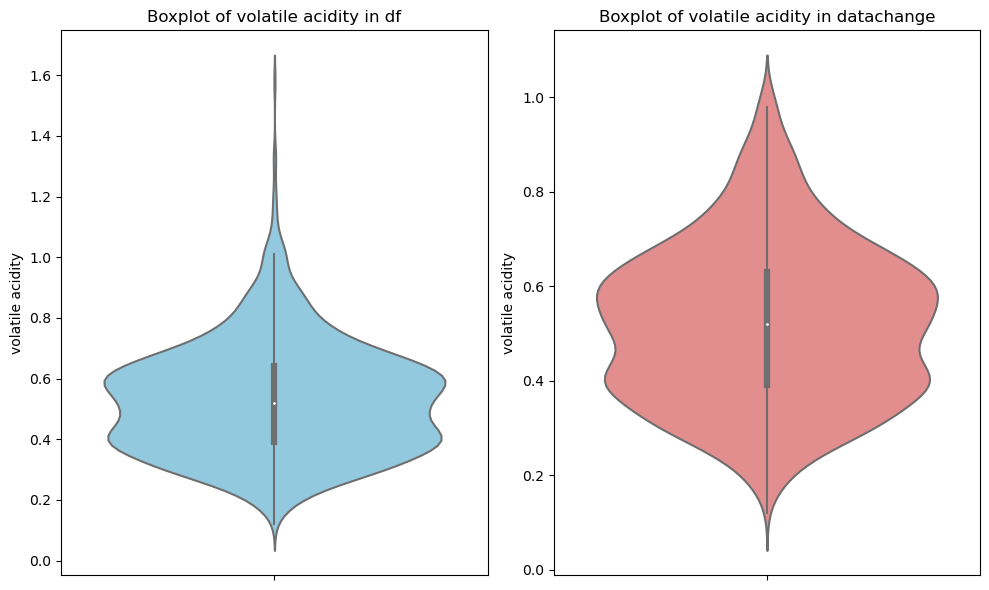

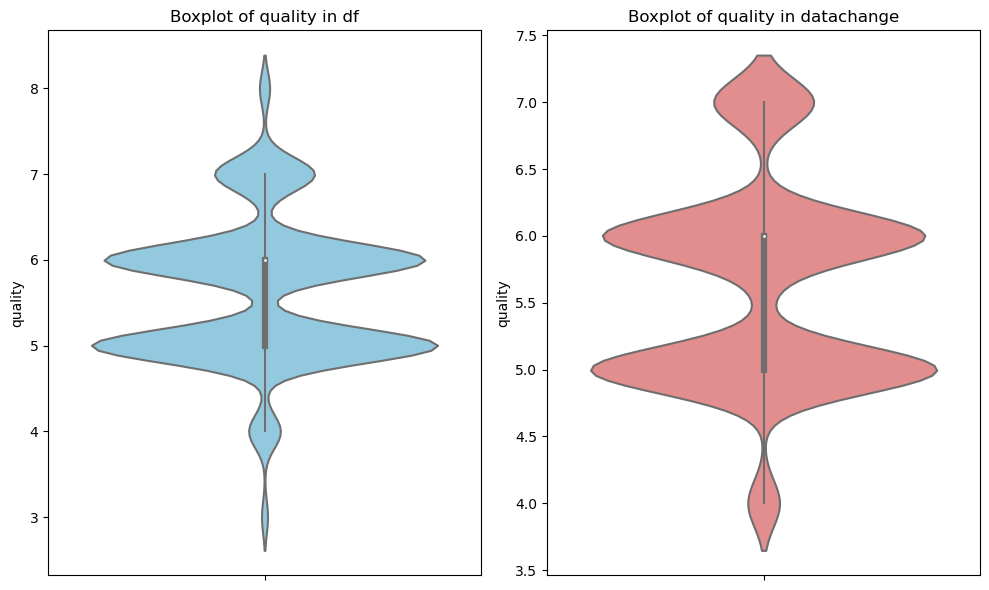

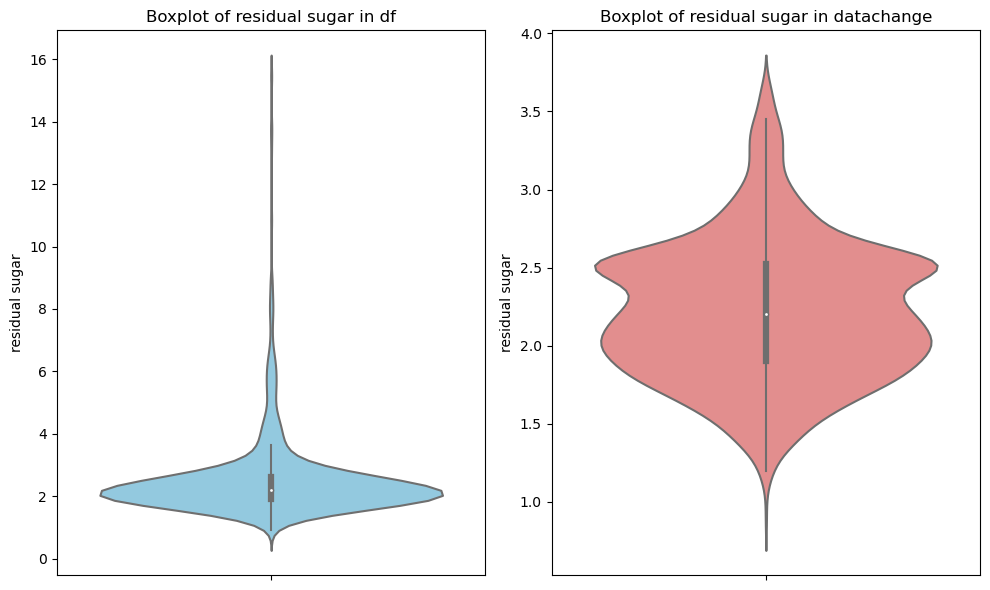

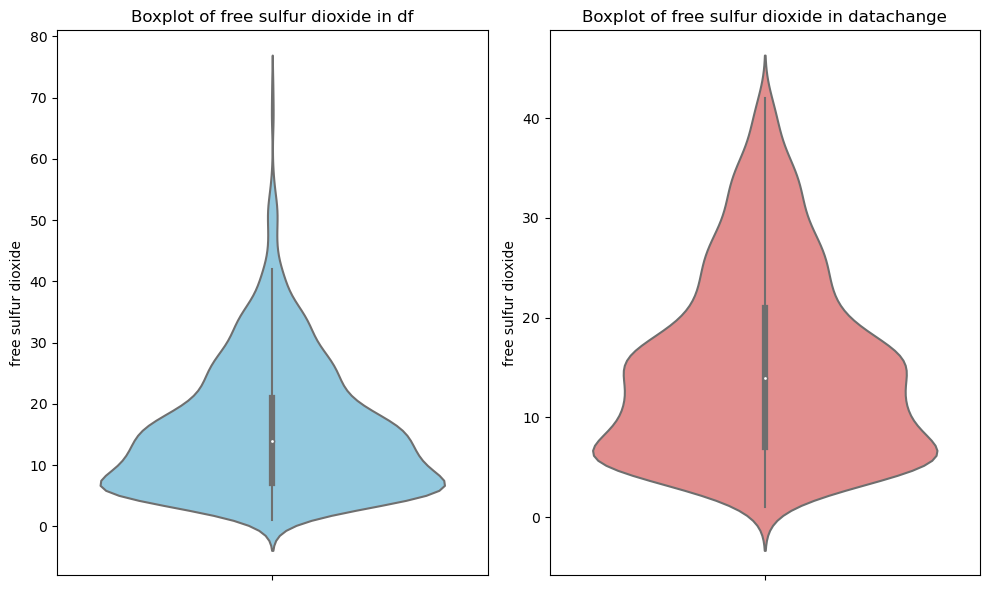

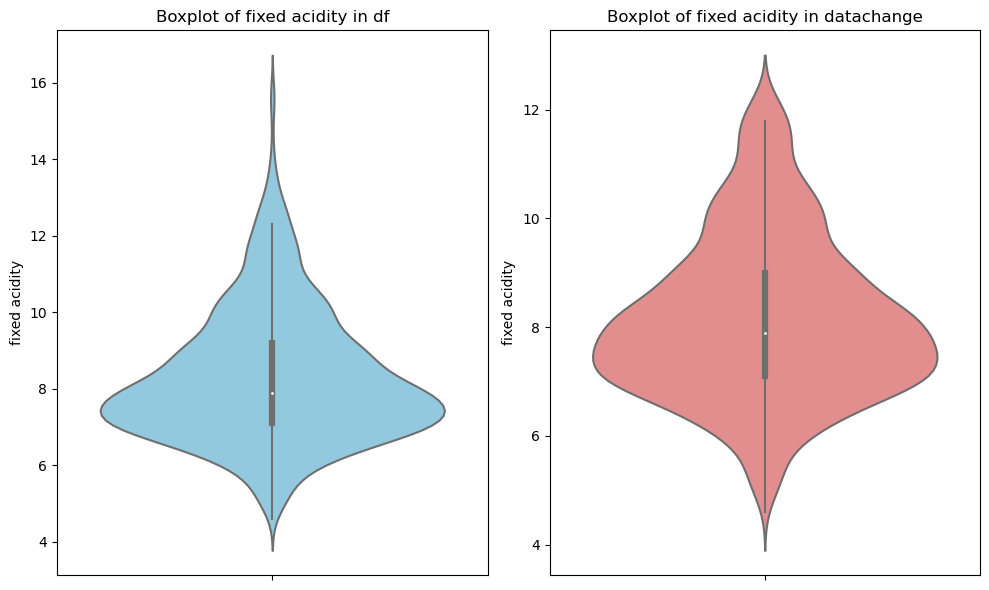

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 두 데이터프레임의 동일한 열 추출
common_columns = set(df.columns) & set(df1.columns)

# 열에 대한 반복문
for column_name in common_columns:
    # 데이터프레임에서 열 선택
    data1_column = df[column_name]
    data2_column = df1[column_name]

    # 상자그림 비교
    plt.figure(figsize=(10, 6))
    
    # 첫 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 1)
    sns.violinplot(y=data1_column, color='skyblue')
    plt.title('Boxplot of {} in df'.format(column_name))

    # 두 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 2)
    sns.violinplot(y=data2_column, color='lightcoral')
    plt.title('Boxplot of {} in datachange'.format(column_name))

    # 전체 플롯의 레이아웃 조정
    plt.tight_layout()
    
    # 플롯 보이기
    plt.show()

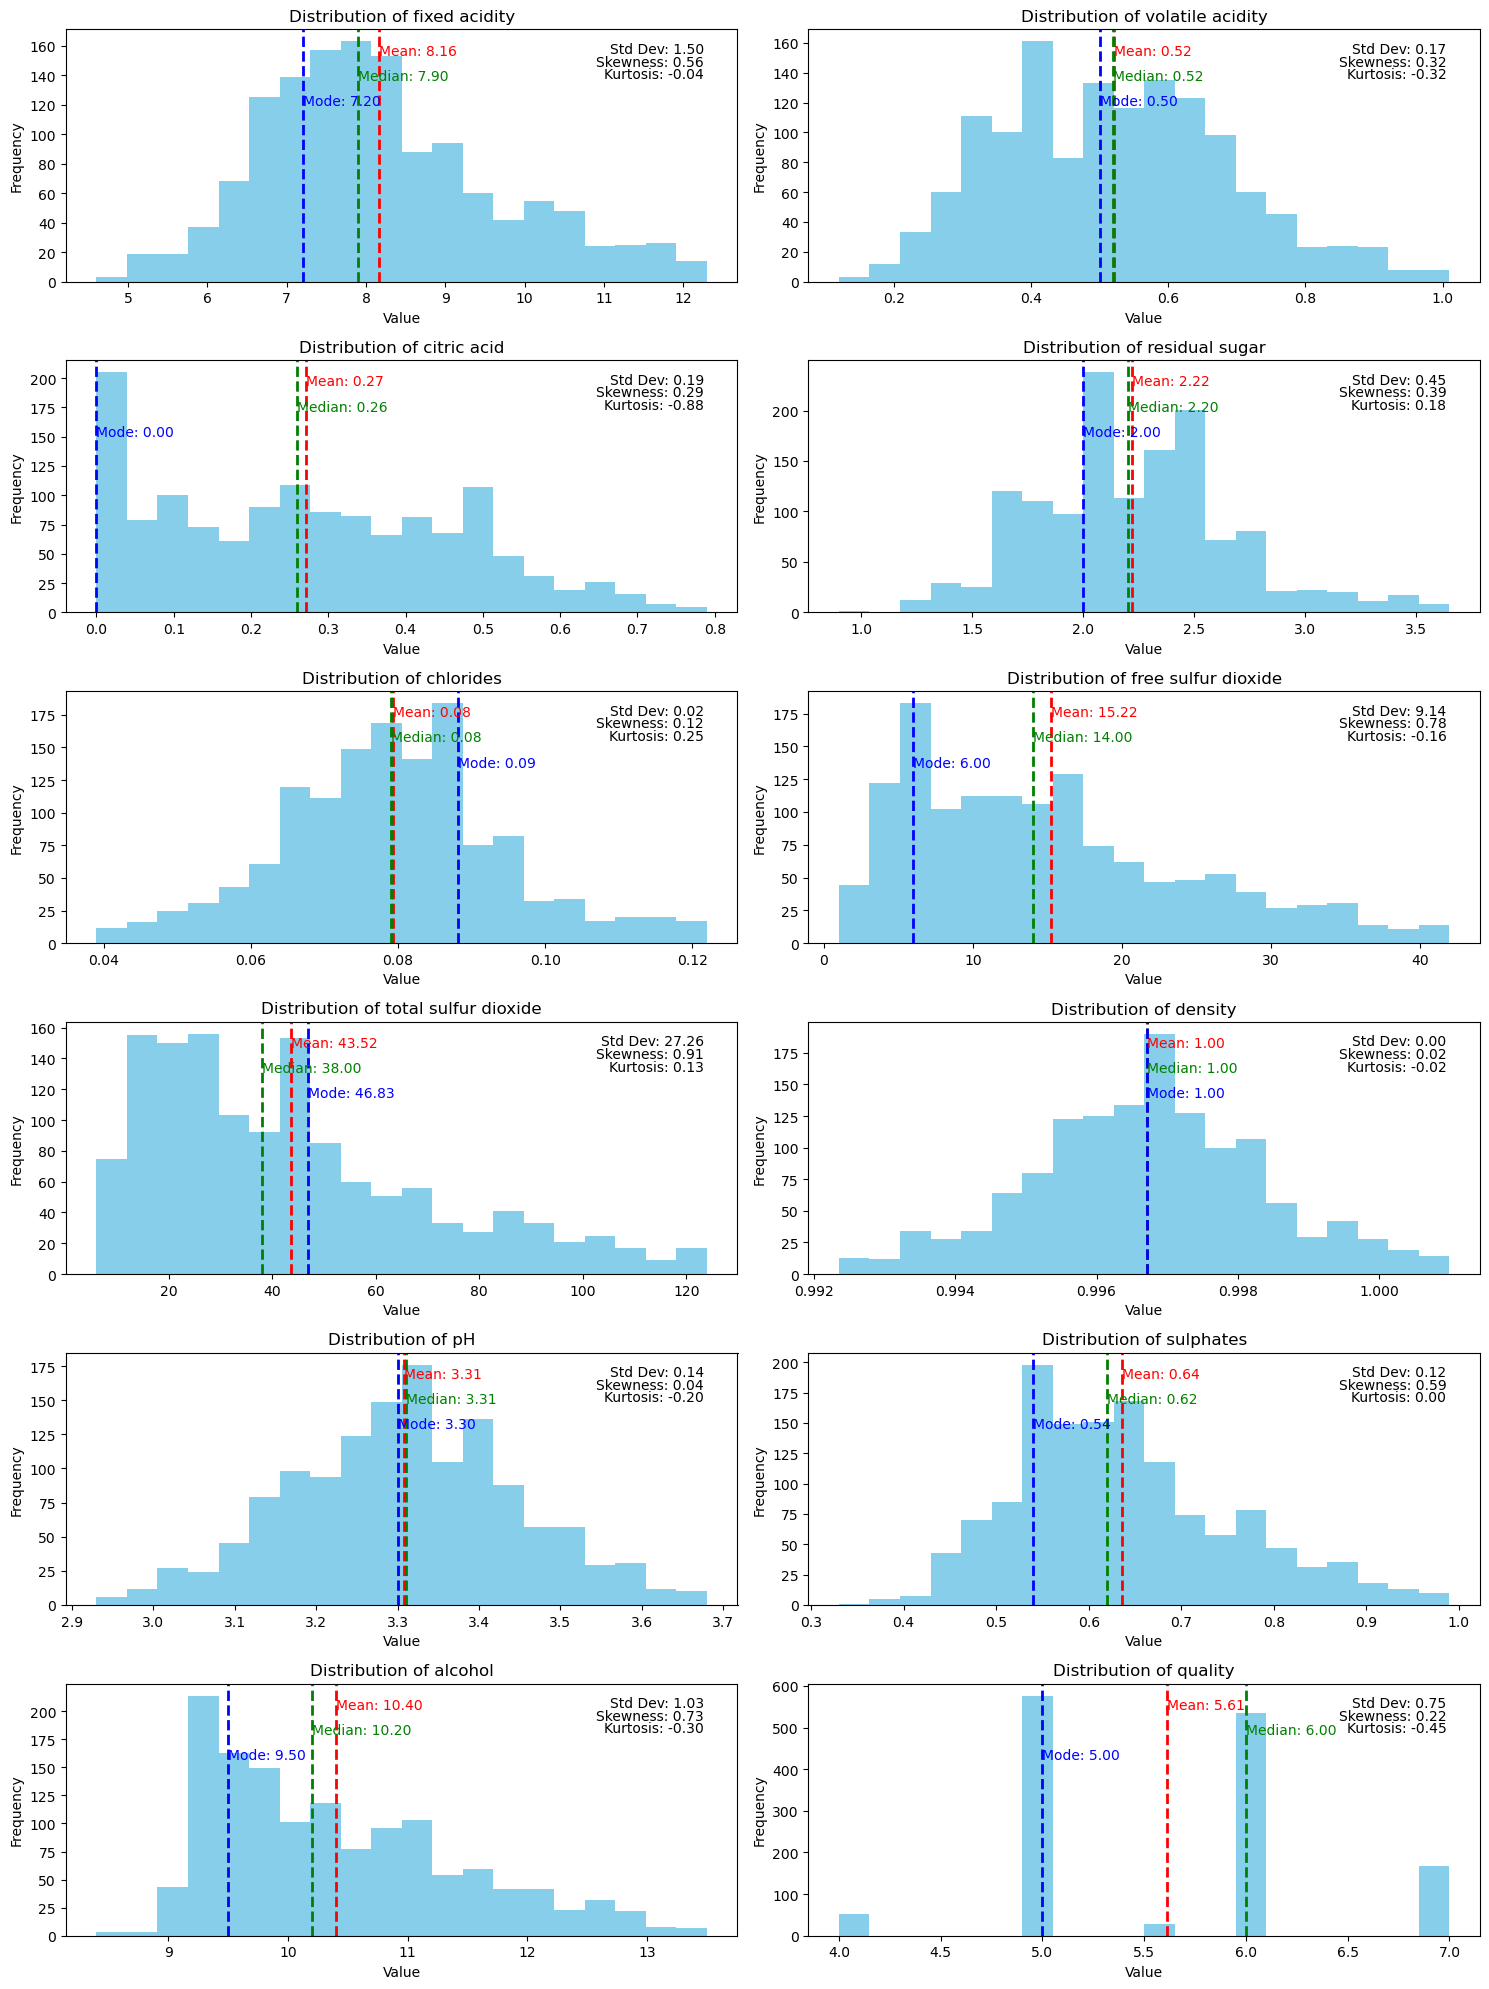

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df1.columns):
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].hist(df1[column], bins=20, color='skyblue')  # 히스토그램 색깔 변경
    axes[row_index, col_index].set_title(f'Distribution of {column}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

    # 통계치 계산
    mean_val = df1[column].mean()
    median_val = df1[column].median()
    mode_val = df1[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df1[column].std()
    skewness_val = df1[column].skew()
    kurtosis_val = df1[column].kurtosis()

    # 통계치를 히스토그램 위에 선으로 표시
    axes[row_index, col_index].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row_index, col_index].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    axes[row_index, col_index].axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')  # 색깔 변경
    
    # 통계치 이름 표시
    axes[row_index, col_index].text(mean_val, axes[row_index, col_index].get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red')
    axes[row_index, col_index].text(median_val, axes[row_index, col_index].get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='green')
    axes[row_index, col_index].text(mode_val, axes[row_index, col_index].get_ylim()[1]*0.7, f'Mode: {mode_val:.2f}', color='blue')  # 색깔 변경

    # 표준편차, 첨도, 왜도를 히스토그램 오른쪽 상단에 텍스트로 표시
    axes[row_index, col_index].text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')
    axes[row_index, col_index].text(0.95, 0.90, f'Skewness: {skewness_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')
    axes[row_index, col_index].text(0.95, 0.85, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()